# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [12]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
from ML_KNN_manual import train_test_split_df
import ML_mst as mst
from ML_KNN_manual import Scaler
from ML_KNN_manual import KNN_classifier
df_iris = df_iris.sample(frac=1)
mst.print_df_info(df_iris,column_values_count ='label_names')
train_df, test_df = train_test_split_df(df_iris)

Len = 150, shape= (150, 6), columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label', 'label_names'],
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
137                6.4               3.1                5.5               1.8   
147                6.5               3.0                5.2               2.0   
68                 6.2               2.2                4.5               1.5   
143                6.8               3.2                5.9               2.3   
128                6.4               2.8                5.6               2.1   

     label label_names  
137      2   virginica  
147      2   virginica  
68       1  versicolor  
143      2   virginica  
128      2   virginica  
  label_names  count
0      setosa     50
1  versicolor     50
2   virginica     50


In [14]:
column_names = iris['feature_names']
X_train = train_df[column_names]
y_train = train_df["label"]
X_test = test_df[column_names]
y_test = test_df["label"]

In [15]:
iris_dict = dict(zip(df_iris['label'].unique(), df_iris['label_names'].unique()))

In [16]:
scaler = Scaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
n_neighbors = 9
clf = KNN_classifier(k_number = n_neighbors)
clf.fit(X_train_scaled, y_train)

In [18]:
print ('score train = {:.3f}'.format(clf.score(X_train_scaled,y_train)))
print ('score test = {:.3f}'.format(clf.score(X_test_scaled,y_test)))

k_best = n_neighbors # 'compute the best k'
score_best = clf.score(X_test_scaled, y_test) #'compute the best score'
print ('The best k = {} , score = {:.3f}'.format(k_best,score_best ))

score train = 0.973
score test = 0.947
The best k = 9 , score = 0.947


## Synthetic dataset  

<IPython.core.display.Javascript object>


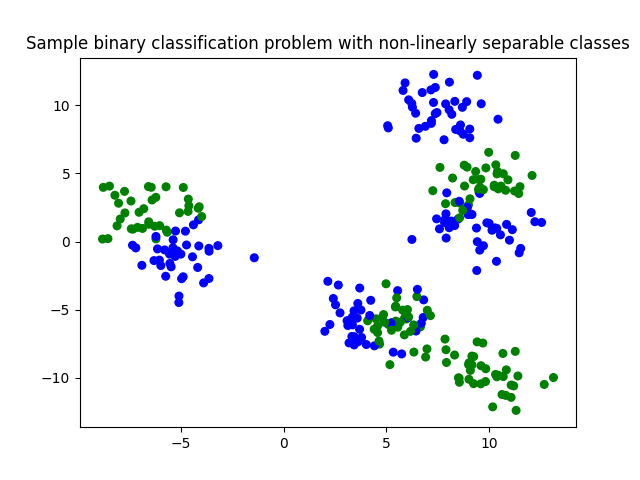

In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

In [137]:
n_neighbor = 11
clf = KNeighborsRegressor(n_neighbor)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)

In [138]:
k_best = n_neighbor # 'compute the best k'
score_best = score #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 11 , score = 0.7426184926184927


In [139]:
# visualize decision boundary 

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


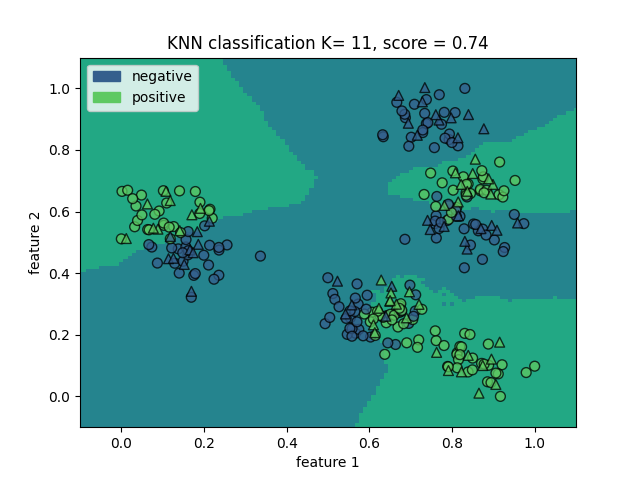

In [140]:
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(n_neighbor, score), 
                               precision=0.01,plot_symbol_size = 50)